In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data=pd.read_csv('/content/Dataset_master.xlsx - Upper Confidence Bound Facebook.csv')
data.head()

,Advertisement 1,Advertisement 2,Advertisement 3,Advertisement 4,Advertisement 5,Advertisement 6,Advertisement 7,Advertisement 8,Advertisement 9,Advertisement 10
0,0,0,0,1,0,1,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(15000, 10)

In [ ]:
import math
T = 15000
num_ads = 10
ads_selected = []
numbers_of_selections = [0] * num_ads
sums_of_rewards = [0] * num_ads
total_reward = 0

for n in range(0, T):
  ad = 0
  max_upper_bound = 0
  for i in range(0, num_ads):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = data.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

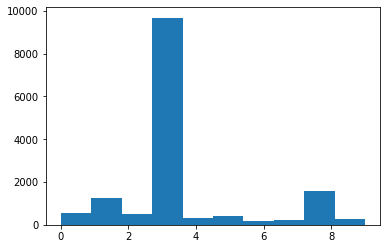

In [ ]:
plt.hist(ads_selected)
plt.show()